# 그래프 그리기

## 데이터 세트 로드

In [21]:
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data[:,:2]
labels = iris.target

print(f"data : {data}")

data : [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5

c:\Users\maum.ai\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maum.ai\AppData\Local\Temp\ipykernel_14080\1991066286.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data[labels == cl, 0], data[labels == cl, 1], c=cmap(index), marker=markers[index],s=60,label=classes[index])
C:\Users\maum.ai\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **k

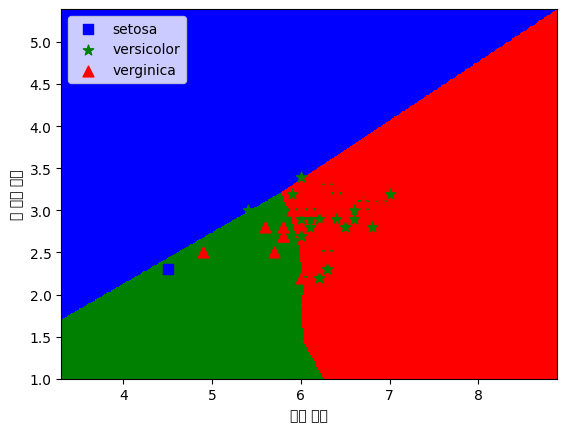

In [22]:
import numpy
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s','*','^')

colors= ('blue','green','red')

cmap = ListedColormap(colors)

x_min, x_max = data[:,0].min() - 1, data[:,0].max() + 1
y_min, y_max = data[:,1].min() - 1, data[:,1].max() + 1
resoultion = 0.01
x, y = numpy.meshgrid(
    numpy.arange(x_min,x_max,resoultion),
    numpy.arange(y_min,y_max,resoultion)
)

from sklearn.neural_network._multilayer_perceptron import MLPClassifier
mlp = MLPClassifier(random_state=1,max_iter=10)

mlp.fit(data,labels)

z = mlp.predict(
    numpy.array(
        [x.ravel(),y.ravel()]
    ).T
)

z = z.reshape(x.shape)

plt.pcolormesh(x,y,z,cmap=cmap)
plt.xlim(x.min(),x.max())
plt.ylim(y.min(),y.max())


classes = ["setosa", "versicolor", "verginica"]

for index,cl in enumerate(numpy.unique(labels)):
    plt.scatter(data[labels == cl, 0], data[labels == cl, 1], c=cmap(index), marker=markers[index],s=60,label=classes[index])

plt.xlabel("꽃잎 길이")
plt.ylabel("꽃 받침 길이")

plt.legend(loc='upper left')

plt.show()